# Laboratorio 1: Regresión utilizando Mínimos Cuadrados

En este laboratorio trabajaremos con la base de datos $<ejemplo\_regresion.mat>$. Estos datos representan
una señal para la cual se tienen las características $\bf{x}$, las etiquetas reales $\bf{y}$ (sin ruido) y las
observaciones ruidosas $\bf{t}$. La siguiente figura muestra una representación de los datos descritos.

Primero debemos adicionar algunas librerías sobre las cuales vamos a trabajar durante el módulo

1. matplotlib.pyplot 
2. numpy 
3. math
4. scipy.io 

Con el objetivo de importar una librería debemos realizar el siguiente comando:

$\textbf{import}$ $nombreLib$ $\textbf{as}$ $variableNombreLib$

El término $variableNombreLib$ indica la etiqueta con la cual llamaremos dicha librería. Algunas de las librerías mas importantes son

In [1]:
import matplotlib.pyplot as plt # Libreria para graficar y visualizar resultados
import numpy as np # libreria de manejo de datos matriciales y operaciones multivariadas
import math # Libreria de opreaciones matematicas
import scipy.io as sio # Libreria para cargar o escribir datos (Se utilizara para cargar nuestros DATASETS)
%matplotlib inline 

Para cargar nuestro $DATASET$, utilizaremos la función $\textbf{loadmat}$ de la librería $\textbf{sio}$ de la forma

$dataSet$ = $\textbf{sio.loadmat}$$('nombredelarchivoFormatoMAT.mat')$

In [2]:
data = sio.loadmat('ejemplo_regresion.mat')


Debido a que la variable $\bf{data}$ es un diccionario que contiene las variables $\bf{x}$, $\bf{t}$ y $\bf{y}$, es necesario extraerlas y asignarlas apropiadamente para su procesamiento. La forma de asignarlas a una respectiva variable es:

$variableDestino = diccName['nombreCampo']$

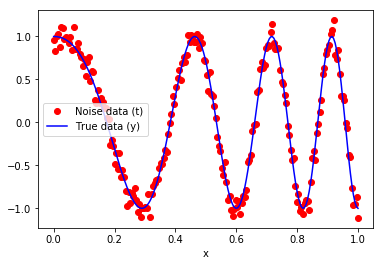

In [3]:
x = data['x'] # Se accede al campo x donde se encuentran las características del conjunto de entrenamiento
N,D = x.shape
t = data['t'] # Se accede al campo de las etiqueta (valores reales observados con ruido)
y = data['y'] # Se accede al campo de las etiquetas sin ruido (para verificacion)

plt.plot(x,t,'or')
plt.plot(x,y,'-b')
plt.xlabel('x')
plt.legend(('Noise data (t)', 'True data (y)'))

(200L, 1L) (140L, 1L)


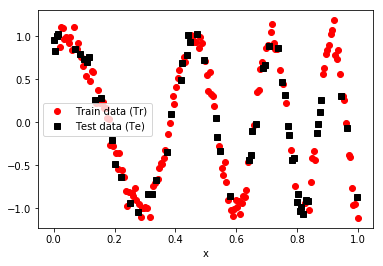

In [4]:
id = np.random.permutation(N)

perTrain = 0.7
NTr = int(round(perTrain*N))
idTr = id[:NTr]
idTe =id[NTr:]
xTr = x[idTr]
xTe = x[idTe]
tTr = t[idTr]
tTe = t[idTe]
print x.shape,xTr.shape
plt.plot(xTr,tTr,'or')
plt.plot(xTe,tTe,'sk')
plt.xlabel('x')
plt.legend(('Train data (Tr)', 'Test data (Te)'))



Luego de tener nuestros datos debidamente almacenados en sus respectivas variables debemos recordar que para una tarea de machine learning, nuestro conjunto de datos serán: 

$\bullet$  Observaciones para $\bf{X}=[\bf{x}_1,\bf{x}_2,\cdots, \bf{x}_N]\in \mathbb{R}^{N\times D}$, donde cada vector observado es de dimensionaledad $\bf{x}\in \mathbb{R}^{D\times 1}$

$\bullet$  Etiquetas (flotantes) para $\bf{t}\in \mathbb{R}^{N\times 1}$

# Funcion de regresión lineal y error

In [5]:
def LS(X,t,basisFNC,NbF):
    Ndata,D = X.shape
    #print Ndata,D
    yEst = np.zeros((Ndata,1))
    # Calculo de la matriz PHI de funciones base
    PHI = np.zeros((Ndata,NbF+1))
    PHI[:,0] = 1
    mu = np.linspace(0.0, 1.0, NbF+1)
    s2 = np.var(mu)
    for n in range(0,Ndata):
        #print X[n]
        for i in range(1,NbF+1):
            if basisFNC == 'pol':                
                PHI[n][i] = X[n]**(i)
            if basisFNC == 'exp':
                PHI[n][i] = math.exp(-((X[n]-mu[i])**2)/(2*s2))
            if basisFNC == 'sig':
                PHI[n][i] = (1 / (1 + np.exp(-((X[n]-mu[i])/math.sqrt(s2)))))
    
    # Luego se estima el mejor W que maximiza la verosimilitud utilizando minimos cuadrados
    PHIT = PHI.T
    w_ml = np.linalg.inv(PHIT.dot(PHI)).dot(PHIT.dot(t))
    yEst = PHI.dot(w_ml)
    #print w_ml
    return PHI,w_ml,yEst, s2  

def Erms(to, te):
    N, d = to.shape
    eRMS = np.sqrt((1.0/N)*np.sum((to-te)**2))
    return eRMS

Este módulo realiza la tarea de ajusta un conjunto de observaciones $\bf X$ a unas etiquetas $\bf t$ a partir de la selección del mapeo de una cantidad $M$ de funciones base que pueden ser de tipo polinomial, exponencial y sigmoidal. Estas funciones base permiten llevar nuestras observaciones a un espacio de representación mas relevante en el cual el ajuste de los datos presenta un mejor desempeño.

El módulo denominado $\bf LS$ se ejecuta de mediante el siguiente comando

$W\_ML, EtiquetaEstimada$ $=$ $\bf LS$$(observaciones,etiquetas,tipoFCNbase,M)$

Dicha función recibe cómo argumentos de entrada:

$\bullet$ observaciones: matriz de dimensión $\mathbb{R}^{N\times D}$ que contiene los patrones a modelar

$\bullet$ etiquetas: vector de dimensión $\mathbb{R}^{N\times 1}$ que contiene las etiquetas correspondientes a cada dato

$\bullet$ tipoFCNbase: dato tipo cadena para identificar el tipo de funcion base a utilizar. Esta cadena puede ser:

  $-$ 'pol': para una funcion de base polinomial
 
  $-$ 'exp': para una funcion de base exponencial
    
  $-$ 'sig': para una funcion de base sigmoidal
  
Dicha función tiene cómo argumentos de salida:

$\bullet$ $W\_ML$: vector de coeficientes que realiza la estimación de los datos de la forma $\hat{\bf{y}} = \bf{w}_{ML}^\top \phi(\bf{x}_n)$

$\bullet$ EtiquetaEstimada: vector de tamaño $\mathbb{R}^{N \times 1} $ que contiene las etiquetas estimadas para los respectivos $\bf X$

## Regresion con funciones bases polinomial

Hacemos la regresion lineal con bases polinomial, despues de un proceso empirico de buscar el mejor numero de funciones bases, se establece que con 19 es el que mas se acerca a la señal. Se calcula el Error del Train y del Test y se puede ver que con tiene un muy bajo porcentaje de error. Lo que se quiere llegar es a una funcion como y.

Error Test 0.1230996011536382
Error Train 0.1722483225300385


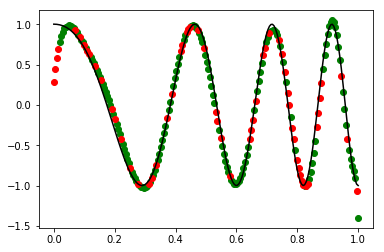

In [6]:
PHIbTr,w_ML,yEstimadoTr, s2 = LS(xTr,tTr,'pol',19)
PHIbTe,w_MLTe,yEstimadoTe, s2 = LS(xTe,tTe,'pol', 19)
yEstimadoTe = PHIbTe.dot(w_ML)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,y, '-k')
#plt.plot(x,t, '-b')

RMStest = Erms(tTr, yEstimadoTr)
RMStrain = Erms(tTe, yEstimadoTe)

print "Error Test", RMStest
print "Error Train", RMStrain

# Regresion con funciones bases exponencial

Ahora analizaremos la señal pero esta vez las funciones bases seran exponenciales y la misma cantidad. A la hora de entrenar resulta muy prometedor (Linea Verde), un poco menos que con funciones bases polinomiales . Pero a la hora de testear (Linea Roja) las cosas se van por otro lugar muy distinto.

Error Test 0.4996147868455358
Error Train 0.6551584904287457


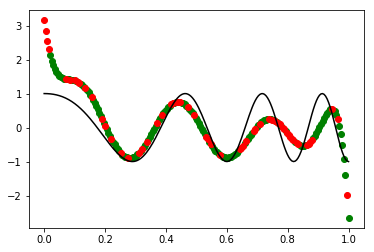

In [7]:
PHIbTr,w_ML,yEstimadoTr, s2 = LS(xTr,tTr,'exp',50)
PHIbTe,w_MLTe,yEstimadoTe, s2 = LS(xTe,tTe,'exp',50)
yEstimadoTe = PHIbTe.dot(w_ML)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,y, '-k')

RMStest = Erms(tTr, yEstimadoTr)
RMStrain = Erms(tTe, yEstimadoTe)

print "Error Test", RMStest
print "Error Train", RMStrain

# Regresion con funciones bases sigmoidal
Ahora analizaremos la señal pero esta vez las funciones bases seran sigmoidal y la misma cantidad que venimos trabajando. A la hora de entrenar tambien es bastante bueno (Linea Verde), pero igual con este modelo de regresion lineal, lo mejor viene siendo trabajar con funciones bases polinomiales. A la hora de testear, sucede lo mismo que con las funciones exponenciales.

En conclusion, con este modelo de regresión lineal, viene mejor para esta señal trabajar con funciones bases polinomiales.

Error Test 0.6970546031288927
Error Train 1.1080584770446362


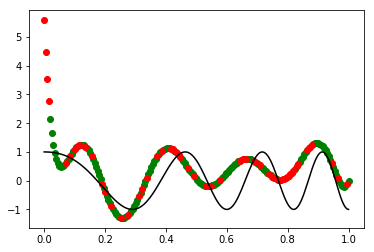

In [8]:
PHIbTr,w_ML,yEstimadoTr, s2 = LS(xTr,tTr,'sig',15)
PHIbTe,w_MLTe,yEstimadoTe, s2 = LS(xTe,tTe,'sig',15)
yEstimadoTe = PHIbTe.dot(w_ML)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,y, '-k')

RMStest = Erms(tTr, yEstimadoTr)
RMStrain = Erms(tTe, yEstimadoTe)

print "Error Test", RMStest
print "Error Train", RMStrain

# Funcion de Regresion lineal con regularización y Error

Controlar el sobre entrenamiento.

In [9]:
def LS_Reg(X,t,basisFNC,NbF,lambdaI):
    Ndata,D = X.shape
    I = np.eye(NbF+1)
    #print Ndata,D
    yEst = np.zeros((Ndata,1))
    # Calculo de la matriz PHI de funciones base
    PHI = np.zeros((Ndata,NbF+1))
    PHI[:,0] = 1
    mu = np.linspace(0.0, 1.0, NbF+1)
    s2 = np.var(mu)
    for n in range(0,Ndata):
        #print X[n]
        for i in range(1,NbF+1):
            if basisFNC == 'pol':                
                PHI[n][i] = X[n]**(i)
            if basisFNC == 'exp':
                PHI[n][i] = math.exp(-((X[n]-mu[i])**2)/(2*s2))
            if basisFNC == 'sig':
                PHI[n][i] = (1 / (1 + np.exp(-((X[n]-mu[i])/math.sqrt(s2)))))
# Luego se estima el mejor W que maximiza la verosimilitud utilizando minimos cuadrados
    PHIT = PHI.T
    w_ml = np.linalg.inv(lambdaI*I+PHIT.dot(PHI)).dot(PHIT.dot(t))
    yEst = PHI.dot(w_ml)
    #print w_ml
    return PHI,w_ml,yEst

def Erms(to, te):
    N, d = to.shape
    eRMS = np.sqrt((1.0/N)*np.sum((to-te)**2))
    return eRMS

# Regresion con regularización con funciones bases polinomial

A la hora de hacer la regresion con regularizacion con funciones bases polinomiales, se logra disminuir el error pero de una manera muy poco visible, pero se logra que cuando se aumentan las funciones bases, no se sobreentrena como pasa en la regresion lineal normal.

Error Test 0.22810296728150897
Error Train 0.25861218985766504


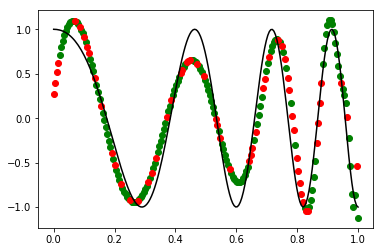

In [10]:
lambdaI = math.exp(-18.0)
PHIbTr,w_MLReg,yEstimadoTr = LS_Reg(xTr,tTr,'pol',100, lambdaI)
PHIbTe,w_MLRegTe,yEstimadoTe = LS_Reg(xTe,tTe,'pol',100, lambdaI)
yEstimadoTe = PHIbTe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,y, '-k')

RMStest = Erms(tTr, yEstimadoTr)
RMStrain = Erms(tTe, yEstimadoTe)

print "Error Test", RMStest
print "Error Train", RMStrain

# Regresión con regularización con funciones exponenciales

A la hora de hacerlo con funciones bases exponenciales, sigue existiendo el mismo que con la regresión lineal normal. Se puede observar que tambien aumento el error, ya que se suavizo la funcion demasiado a la hora de crecer en el eje x.

Error Test 0.5238181714405472
Error Train 0.6855146142172458


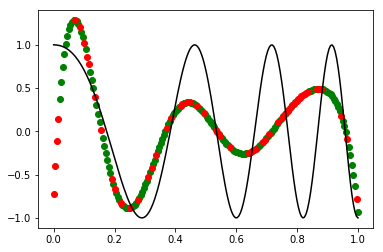

In [11]:
lambdaI = math.exp(-18.0)
PHIbTr,w_MLReg,yEstimadoTr = LS_Reg(xTr,tTr,'exp',200, lambdaI)
PHIbTe,w_MLRegTe,yEstimadoTe = LS_Reg(xTe,tTe,'exp',200, lambdaI)
yEstimadoTe = PHIbTe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,y, '-k')

RMStest = Erms(tTr, yEstimadoTr)
RMStrain = Erms(tTe, yEstimadoTe)

print "Error Test", RMStest
print "Error Train", RMStrain

# Regresión con regularización con funciones sigmoidales

Lo mismo resulta con las funciones sigmoidales, aumento el error con regularizacion a la hora de hacer el Train, pero cuando se testea, la función resultante no es nada parecida a lo que necesitamos, por que se suaviza a la hora de crecer en el eje x.

Error Test 0.5426214242416376
Error Train 0.646031665767386


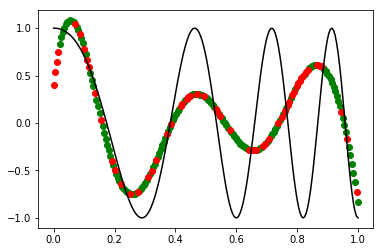

In [12]:
lambdaI = math.exp(-18.0)
PHIbTr,w_MLReg,yEstimadoTr = LS_Reg(xTr,tTr,'sig',200, lambdaI)
PHIbTe,w_MLRegTe,yEstimadoTe = LS_Reg(xTe,tTe,'sig',200, lambdaI)
yEstimadoTe = PHIbTe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,y, '-k')

RMStest = Erms(tTr, yEstimadoTr)
RMStrain = Erms(tTe, yEstimadoTe)

print "Error Test", RMStest
print "Error Train", RMStrain

# Regresion Bayesiana

A la hora de analizar nuestra señal con la regresion bayesiana, tenemos que tener tambien una matriz de funciones bases, en este caso lo haremos con funciones bases polinomiales, despues de variar el alpha y beta, no se pudo llegar a un ajuste como en la regresion lineal y regresion lineal con regularización.

(140L, 100L)
(100L, 1L) (100L, 100L)


C:\Users\XxSoaD\Anaconda2\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


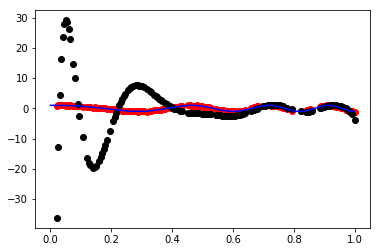

In [13]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr, s2 = LS(xTr,tTr,'pol',M-1)
print PHI.shape

iT =200 # Numero de iteraciones
alpha = 0.0
beta = 3.0
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(tTr))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((tTr-PHI.dot(mn)).T).dot(tTr-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(tTr))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(xTr,tTr,'or')
plt.plot(xTr,yEstfin,'ok')
plt.plot(x,y,'-b')

# Regresión bayesiana con funciones base exponencial

Con regresion bayesiana con funciones base exponencial, las cosas mejoraron drasticamente comparandola con la regresion lineal. Con estas funciones bases, son las que mas se ajusta a la señal en comparación con las demas funciones bases, y esto se puede apreciar en las graficas.

(140L, 100L)
(100L, 1L) (100L, 100L)


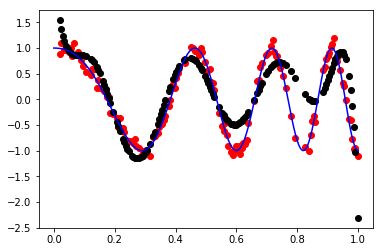

In [14]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr, s2 = LS(xTr,tTr,'exp',M-1)
print PHI.shape

iT = 100 # Numero de iteraciones
alpha = 0.0
beta = 3.0
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(tTr))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((tTr-PHI.dot(mn)).T).dot(tTr-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(tTr))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(xTr,tTr,'or')
plt.plot(xTr,yEstfin,'ok')
plt.plot(x,y,'-b')

# Regresión bayesiana con funciones base sigmoidal

Con regresion bayesiana con funciones base sigmoidales, se ve mejorado tambien como con la exponencial en comparativa con la regresion lineal. Se ajusta a la señal pero hay mucha diferencia con la misma.

(140L, 100L)
(100L, 1L) (100L, 100L)


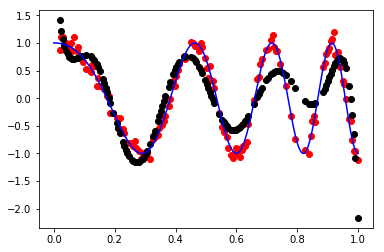

In [15]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr, s2 = LS(xTr,tTr,'sig',M-1)
print PHI.shape

iT = 100 # Numero de iteraciones
alpha = 0.0
beta = 3.0
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(tTr))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((tTr-PHI.dot(mn)).T).dot(tTr-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(tTr))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(xTr,tTr,'or')
plt.plot(xTr,yEstfin,'ok')
plt.plot(x,y,'-b')

### Preguntas

a. ¿ En que afecta la variacion de la cantidad de funciones base el resultado final de regressión?

En que si hay demasiadas funciones bases, se sobreentrena el modelo.

b. ¿ Cómo se podría solucionar el problema en las zonas donde la señal no es bien modelada?


Regularizando, como ya hemos visto en el laboratorio

c. ¿ Que tipo de funcion base considera arrojar un mejor desempeño?

En regresion lineal y regresion lineal con regularizacion las funciones bases polinimiales, y para la regresion bayesiana las funciones bases exponenciales, para este tipo de señal.